<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



## Integrantes
 * Alvarez Juan Antonio
 * Devesa Maria Roberta

## Analisis y visualización de datos 

In [62]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob
import os
#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

In [63]:
#para poder correr comandos de bash o listar las carpetas, como en este ejemplo, hay que anteponer el símbolo de exclamación:
!ls

1_Análisis_y_visulalización.ipynb
2_DetecciónObjetos_Exploración_y_Curación.ipynb


# Analsis de las variables

En esta etapa vamos a recorrer cada feature del dataset para analizar su importancia, forma, y complejidad.
Asimismo vamos a responder a todas las preguntas que fueron planteadas en este trabajo. Las mismas van a estar resaltadas en negrita para que sean sencillas de encontrar.

Comenzamos entonces cargando los archivos csv del dataset de entrenamiento y de testeo


In [64]:
!ls ../dataset/

all-frames_test				       Video2-frames_test.csv
all-frames_train			       Video2-frames_train.csv
crop					       Video3-frames
dataSet_test_crop_features_labels.csv	       Video3-frames_test.csv
dataSet_test_cropped.csv		       Video3-frames_train.csv
dataSet_test.csv			       Video4-frames
dataSet_train_crop_features_labels.csv	       Video4-frames_test.csv
dataSet_train_crop_features_labels_wError.csv  Video4-frames_train.csv
dataSet_train_cropped.csv		       Video5-frames
dataSet_train.csv			       Video5-frames_test.csv
DEUBa_dataset.ipynb			       Video5-frames_train.csv
features.json				       Video6-frames
features.py				       Video6-frames_test.csv
Video10-frames				       Video6-frames_train.csv
Video10-frames_test.csv			       Video7-frames
Video10-frames_train.csv		       Video7-frames_test.csv
Video11-frames				       Video7-frames_train.csv
Video11-frames_test.csv			       Video8-frames
Video11-frames_train.csv		       Video8-frames_test.csv
Video1-frames				       Vide

In [65]:
# Abrimos el archivo y lo chusmeamos:

dataset_train_ = pd.read_csv('../dataset/dataSet_train_crop_features_labels.csv', low_memory=False) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino
dataset_train = dataset_train_.drop(['Unnamed: 0'], axis=1) 

dataset_test_ = pd.read_csv('../dataset/dataSet_test_crop_features_labels.csv', low_memory=False) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino
dataset_test = dataset_test_.drop(['Unnamed: 0'], axis=1) 

Lo primero que podemos hacer para interiorizarnos con el dataset es imprimir la forma (shape) y un head para comenzar a ver qué información posee

In [66]:
print("--- shape (fila, columna) ---")
print ("train: ",dataset_train.shape)
print ("test: " ,dataset_test.shape )

--- shape (fila, columna) ---
train:  (1913, 2063)
test:  (495, 2063)


In [67]:
dataset_train.head(3)

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000001_single_box_0.jpg    640     360   csb   304   359   
1  Video1-frame-000002_single_box_0.jpg    640     360   csb   300   363   
2  Video1-frame-000003_single_box_0.jpg    640     360   csb   301   368   

   ymin  ymax    use videoname  ...      2038      2039      2040      2041  \
0    58   136  train    Video1  ...  0.240625  0.174334  0.082095  0.051256   
1    61   136  train    Video1  ...  0.518146  0.330701  0.123241  0.102351   
2    60   141  train    Video1  ...  0.505053  0.262259  0.195963  0.096156   

       2042      2043      2044      2045      2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  
2  0.378540  0.123568  0.130680  0.034125  0.363607  0.022648  

[3 rows x 2063 columns]

   * **¿Cuántas entradas posee el dataset?**
   
   El dataset de entrenamiento posee 1913 imagenes de entrenamiento y 495 de testeo.



   
   * **¿Cuántas clases distintas de imágenes tenemos? Nombres y cantidad de datos**
   
   Tenemos dos clases ccb (cara con barbijo) y csb (cara sin barbijo) ambos datasets con proporciones similares de cada tipo

In [68]:
def plotbar (df,clase_name,sample_kind):
    df_ = df[clase_name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(x=df_.index,y= df_.values, alpha=0.9)
    plt.title(sample_kind)
    plt.ylabel('Number ', fontsize=12)
    plt.xlabel(clase_name, fontsize=12)
    plt.show()

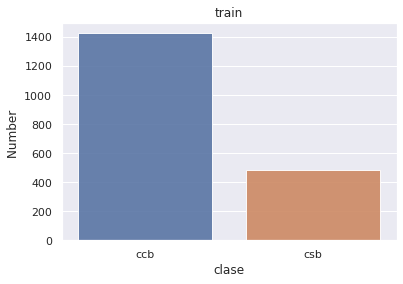

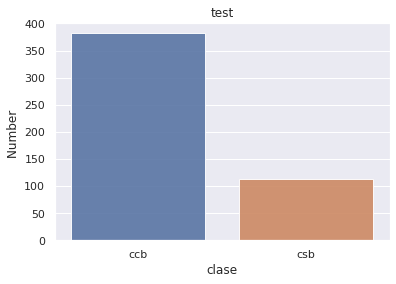

In [69]:
plotbar (dataset_train,'clase','train')
plotbar (dataset_test,'clase','test')


**Obs:** Es natural pensar que la proporción de imágenes con barbijo (ccb) y sin barbijo (csb) va a ser similar en ambos datasets, considerando que el segundo dataset se genera tomando un subconjunto aleatorio del primero.

   
   * **¿Podemos hacer una generalización mas amplia? Nombres y cantidad de datos**
   
   No encontramos ninguna otra clasificación, el resto de los features corresponden a información de los pixeles de la imagen o datos de la misma como tamaño y lugar. 
   
   
   * **¿Hay valores nulos?**
   
   No, no hay.

In [70]:
#number of nan

dataset_train.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
1908    0
1909    0
1910    0
1911    0
1912    0
Length: 1913, dtype: int64

In [71]:
dataset_train.isnull().sum(axis = 0)

filename    0
width       0
height      0
clase       0
xmin        0
           ..
2043        0
2044        0
2045        0
2046        0
2047        0
Length: 2063, dtype: int64

   * **¿Qué tipo de variable es cada una?**
   
   Podemos imprimir los tipos de vaiables usando .dtypes

In [72]:
dataset_train.dtypes

filename     object
width         int64
height        int64
clase        object
xmin          int64
             ...   
2043        float64
2044        float64
2045        float64
2046        float64
2047        float64
Length: 2063, dtype: object

Con las primeras preguntas hicimos una descripción general de los datos. A continuación vamos a explorar cada feature para entender la información que posee y considerar si es de particular interés. Primero veamos qué columnas tenemos:

In [73]:
list(dataset_train.columns)

['filename',
 'width',
 'height',
 'clase',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'use',
 'videoname',
 'bb_width',
 'bb_height',
 'ch_R',
 'ch_G',
 'ch_B',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '

La columna **use** no es de particular interes ya que solo indica si la imagen es del conjunto de entrenamiento o de testeo. Como los datasets ya estan divididos, esta variable no aporta ninguna informacion nueva.   

Haciendo un .describe()  podemos ver que es el mismo valor para todo el dataset.

In [74]:
dataset_train[['use']].describe()

use
count    1913
unique      1
top     train
freq     1913

In [75]:
dataset_test[['use']].describe()

use
count    495
unique     1
top     test
freq     495

Descartamos la columna **use**

In [76]:
dataset_train_selection = dataset_train.drop(['use'], axis='columns')
dataset_test_selection  = dataset_test.drop (['use'], axis='columns')

La columna **filename** no aporta ninguna información ya que solo actúa como un index, es un valor único para cada registro. La podemos descartar.

In [77]:
dataset_train_selection = dataset_train_selection.drop(['filename'], axis='columns')
dataset_test_selection  = dataset_test_selection.drop (['filename'], axis='columns')

En en caso de **videoname** debemos analizarlo un poco más en detalle ya que nos permitirá ver la existencia de algún bias. Si algún video aportara alguna cantidad excesiva de imágenes, y que además fuera diferente al resto, podría generar muchas imágenes similares y generar que el modelo se especialice en un tipo particular de imagen (color , tamaño, patrón).

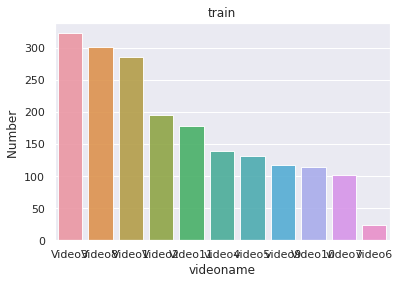

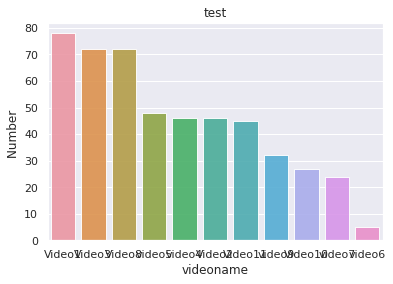

In [78]:
plotbar (dataset_train_selection,'videoname','train')
plotbar (dataset_test_selection,'videoname','test')

Como vemos en el plot si hay diferente cantidad de imágenes según el video al cual pertenecen. Esto podría significar un bias en caso de que las imágenes minoritarias pertenecieran a un tipo particular de situación. 
En este caso son similares al resto de los videos de modo que podemos dejarlas sin considerar que va a generar un problema a futuro.

In [79]:
!ls ../dataset/Video7-frames/train/video7-frame-000255.jpg

../dataset/Video7-frames/train/video7-frame-000255.jpg


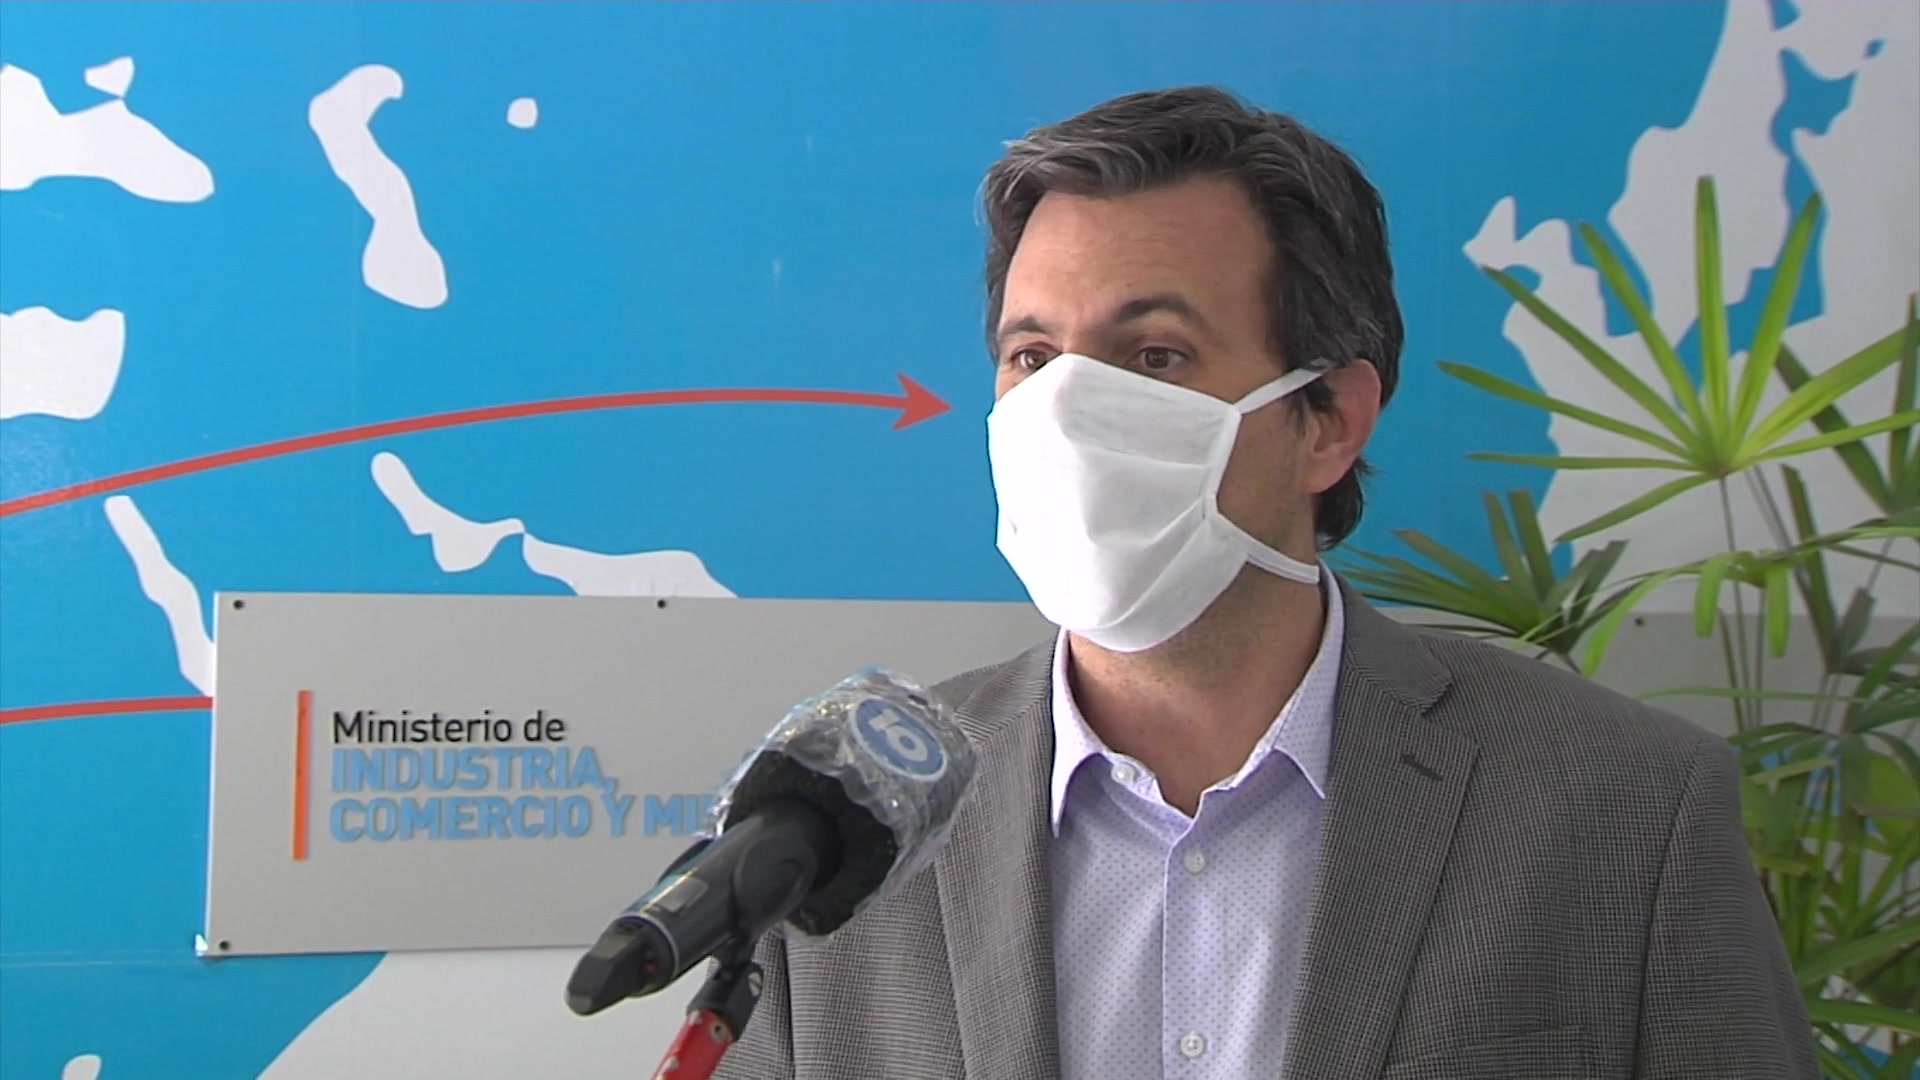

In [80]:
from IPython.display import Image

Image(filename='../dataset/Video6-frames/train/video6-frame-000010.jpg', width= 300) 


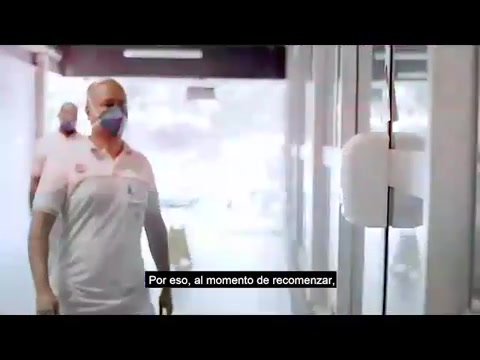

In [81]:
Image(filename='../dataset/Video7-frames/train/video7-frame-000255.jpg', width= 300) 



**Obs:** Esta variable es importante en la etapa de entendimiento de los datos. Pero no será útil para el modelo de ML ya que saber a que video pertenece no aporta información de si una cara está con máscara o no. Por este motivo la eliminamos.


In [82]:
dataset_train_selection = dataset_train_selection.drop('videoname', axis='columns')
dataset_test_selection  = dataset_test_selection.drop('videoname', axis='columns')

Veamos ahora **'xmin', 'xmax', 'ymin', 'ymax'** .En general para la mayoría de los modelos de ML basados en CNN, la ubicación del objeto en la imagen no es importante. Dichos modelos aprenden a reconocer los patrones que caracterizan a un objeto de interés y luego al momento de predecir barren / recorren toda la imagen en busca de los mismos. Es decir se analiza cada lugar de la imagen por igual.

Sin embargo puede llegar a ser un problema cuando el objeto de interes se ubica en el borde de la imagen a predecir. si esto es una situacion que se repite sistematicamente capaz es necesaio tenelo en cunta en el futuro. 

podemos hacer un boxplot para ver el numero de outliers. 

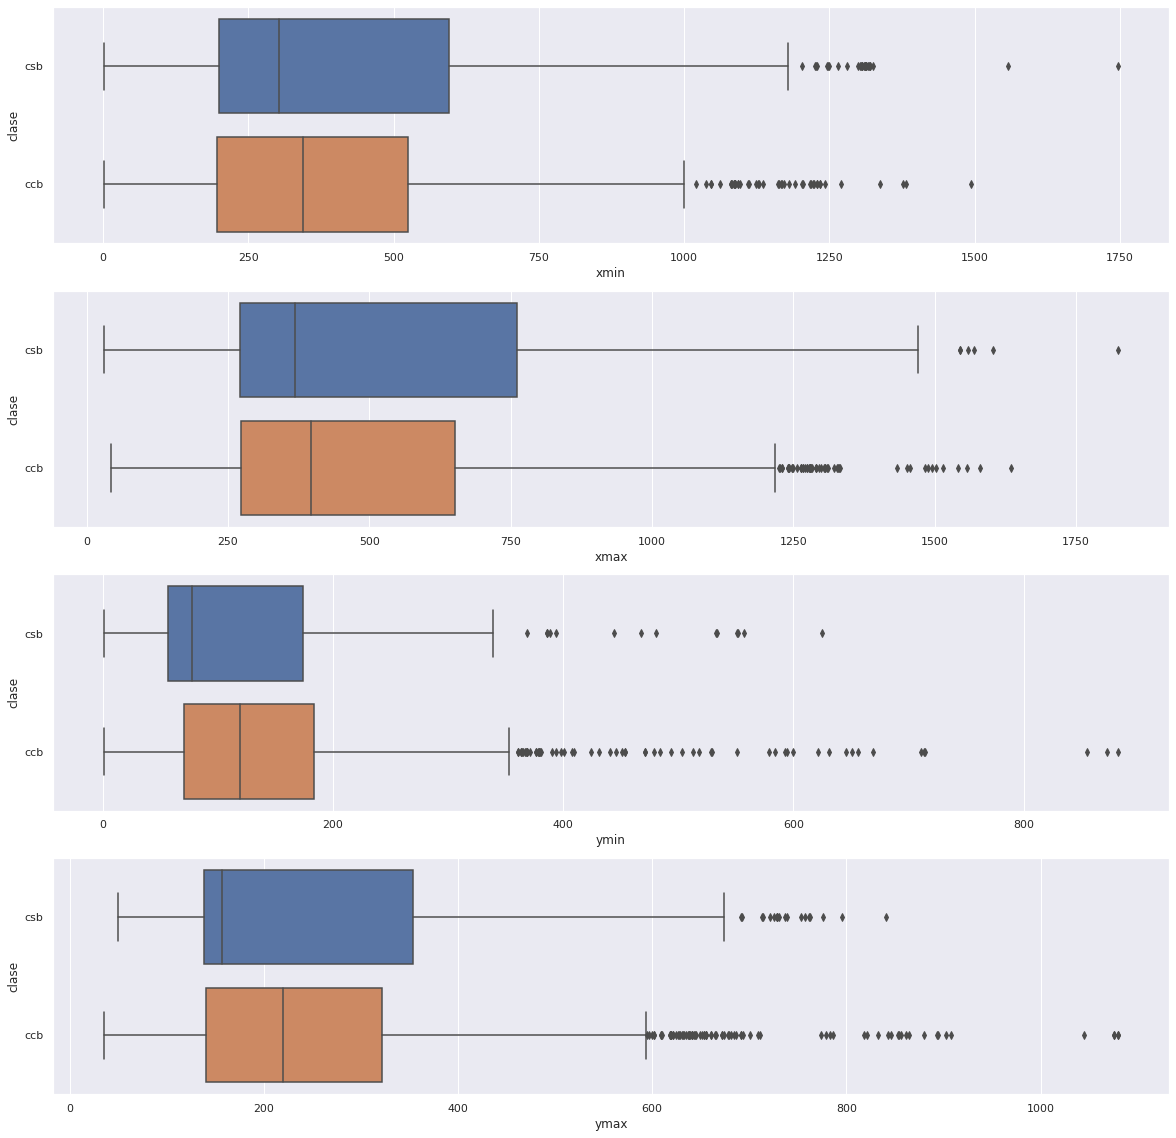

In [83]:
#histogramas:

ny = 1
nx = 4#int(ntot/ny) + 1

df = dataset_train_selection

feature = ['xmin', 'xmax', 'ymin', 'ymax','clase']
f, axes = plt.subplots(nx,ny,figsize=(20,20))

for ax,f in zip(axes.flat[0:4], feature):

    sns.boxplot(x=f,data = df,y="clase", order=['csb','ccb'],ax=ax)
    

plt.show()

In [32]:
dataset_train_selection = dataset_train_selection.drop(['xmin', 'xmax', 'ymin', 'ymax'], axis='columns')
dataset_test_selection  = dataset_test_selection.drop (['xmin', 'xmax', 'ymin', 'ymax'], axis='columns')

**width height and bb_** nos aportan informacion de los tamaños de la imagen y del bounding box. En este caso encuentro interesante ver los outliers y los valores medios, debido que algunos modelos (como RetinaNet) tienen dificltades con algunos tamaños de objetos. Por ejemplo, cuando el widht << heigh, o si el tamaño en general es muy pequeño respecto de la imagen bb_widht << widht

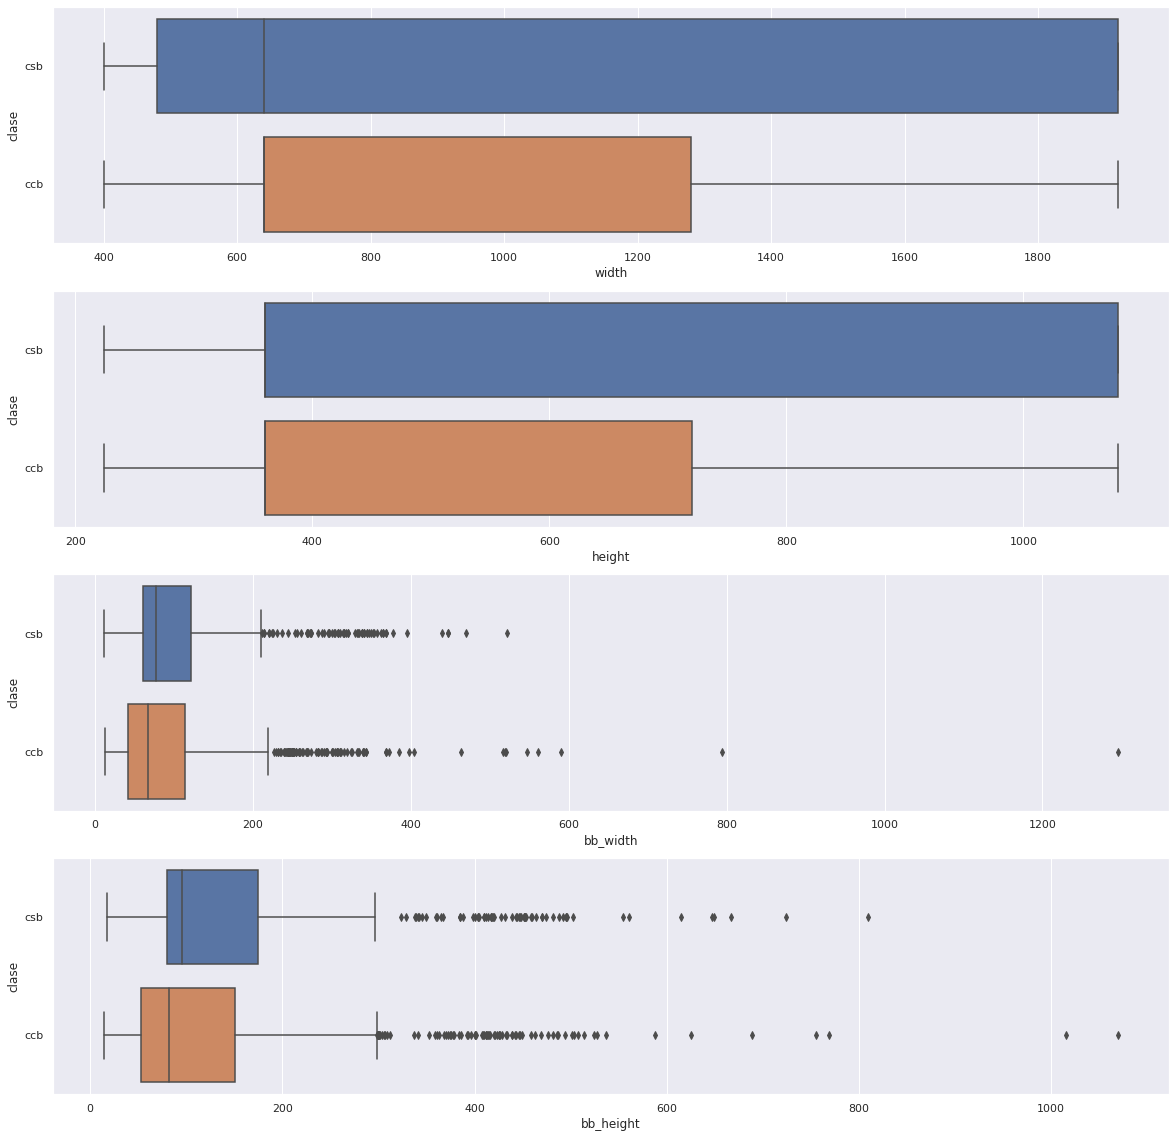

In [84]:
#histogramas:

ny = 1
nx = 4#int(ntot/ny) + 1

feature = ['width','height','bb_width','bb_height']
f, axes = plt.subplots(nx,ny,figsize=(20,20))

for ax,f in zip(axes.flat[0:4], feature):

    sns.boxplot(x=f,data=dataset_train_selection,y="clase", order=['csb','ccb'],ax=ax)
    


plt.show()

    * Las imagenes de ccb suelen ser menores a las imagenes csb, pero los bb mantienen relaciones de tamaño similares entre las clses
    * por otro lado son de una relosucion intermedia. Algunos modelos de CNN podrian requerir GPU para procesar estas resoluciones

De momento, al no saber con que tipo de modelo vamos a abordar la clasificacion no eliminamos ningun registro

In [34]:
dataset_train_selection = dataset_train_selection.drop(['width','height','bb_width','bb_height'], axis='columns')
dataset_test_selection  = dataset_test_selection.drop(['width','height','bb_width','bb_height'], axis='columns')

Analicemos ahora el caso los features RGB : **'ch_R','ch_G','ch_B'**
 
   

In [35]:
dataset_train_selection_rgb = dataset_train_selection[['clase','ch_R','ch_G','ch_B']]
dataset_test_selection_rgb  = dataset_test_selection[['clase','ch_R','ch_G','ch_B']]

dataset_train_selection_rgb.describe()
dataset_test_selection_rgb.describe()

ch_R        ch_G        ch_B
count  495.000000  495.000000  495.000000
mean   135.354631  116.849703  111.000086
std     36.136368   34.304800   35.333680
min     46.532738   38.893169   37.279919
25%    110.035652   90.128910   83.096077
50%    131.243027  113.340546  108.798859
75%    159.204536  140.893372  133.775002
max    231.196365  209.328018  204.349701

In [36]:
def plot_rgb_hist (data,list_columns,Names,tipo):

    Names = ["ccb","csb"]

    list_columns = ['ch_R','ch_G','ch_B']
    
    print("--------------")
    print(tipo)
    print("--------------")
    f, axes = plt.subplots(1,len(list_columns),figsize=(15,5))

    for ax,feature in zip(axes.flat[:len(list_columns)], list_columns):
     
        _min = data[feature].min()
        _max = data[feature].max()

        for name in Names:

            ax.hist(data[data['clase']==name][feature],bins=50,density=True,alpha=0.4,label=name,range=(_min,_max))
        ax.set_xlabel("")
        ax.set_title(feature)
        ax.legend()


    plt.show()

--------------
train
--------------


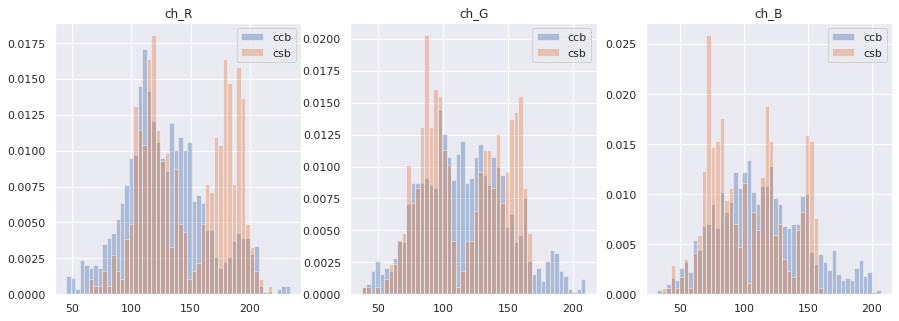

--------------
test
--------------


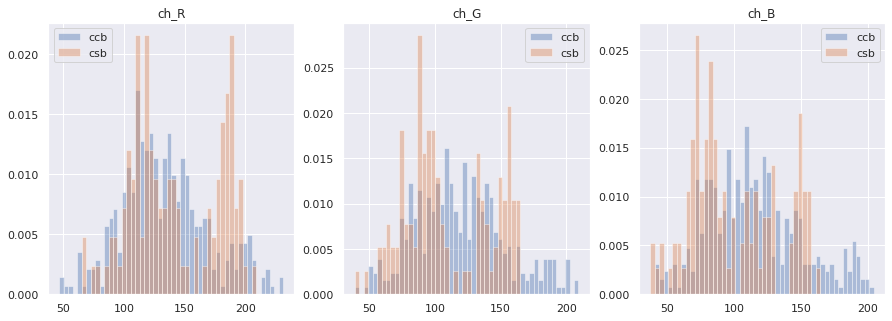

In [37]:
Names = ["ccb","csb"]

list_columns = ['ch_R','ch_G','ch_B']

plot_rgb_hist (dataset_train_selection_rgb,list_columns,Names,"train")
plot_rgb_hist (dataset_test_selection_rgb,list_columns,Names,"test")

Podemos ver de stas distribuciones como para el rojo y verde hay mayores diferencias ntre las imagenes con y sin mascaras , respecto de la banda azul. 

**Obs** Ademas podemos notar como en os casos con mascaras la distribucion tiene un solo pico principal en medio en lugar de dos o mas separados. Esto se podria explicar si consideramos que muchas de las imagens con mascaras tienden a ser blancas de modo que las 3 bandas toman valores similares.

   * **¿Existen outliers en las variables seleccionadas?**
   
   Ya vimos que si al menos en las variables de tamaño de la imagen y el bb_. Sin embargo estas variables no fueron de particular interes por el momento de modo que no eliminamos ningun registro por poseer outliers. 

In [38]:
dataset_train_selection.head(7)

clase        ch_R        ch_G        ch_B         0         1         2  \
0   csb  191.840561  153.567825  132.866669  0.003306  0.110736  0.085072   
1   csb  183.752380  146.789627  126.877037  0.051257  0.181405  0.080709   
2   csb  175.958160  141.141510  121.987831  0.009964  0.171841  0.359899   
3   csb  187.911713  150.097229  129.374207  0.082800  0.228622  0.162064   
4   csb  173.947571  139.453323  120.885750  0.086575  0.182595  0.344001   
5   csb  158.829514  128.892136  113.473740  0.166495  0.217070  0.985985   
6   csb  165.588989  133.297012  116.131401  0.072116  0.263488  0.561463   

          3         4         5  ...      2038      2039      2040      2041  \
0  0.106699  0.011154  0.823523  ...  0.240625  0.174334  0.082095  0.051256   
1  0.096473  0.053091  0.999435  ...  0.518146  0.330701  0.123241  0.102351   
2  0.102196  0.005156  0.892812  ...  0.505053  0.262259  0.195963  0.096156   
3  0.051045  0.012488  0.614972  ...  0.427743  0.051373  0.061770  0.175729   
4  0.104662  0.011670  0.815946  ...  0.615897  0.227388  0.171615  0.095271   
5  0.205633  0.025276  0.444833  ...  0.706548  0.042409  0.098932  0.159592   
6  0.129276  0.011065  0.713007  ...  0.644502  0.387139  0.250740  0.163406   

       2042      2043      2044      2045      2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  
2  0.378540  0.123568  0.130680  0.034125  0.363607  0.022648  
3  0.314424  0.180715  0.015458  0.001125  0.441648  0.007727  
4  0.396625  0.229164  0.042033  0.015454  0.450313  0.105094  
5  0.268108  0.310885  0.030829  0.040465  0.651386  0.153397  
6  0.488034  0.244953  0.015700  0.023341  0.464640  0.030548  

[7 rows x 2052 columns]


   * ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?
   
   veamos que suede en el resto de las variables

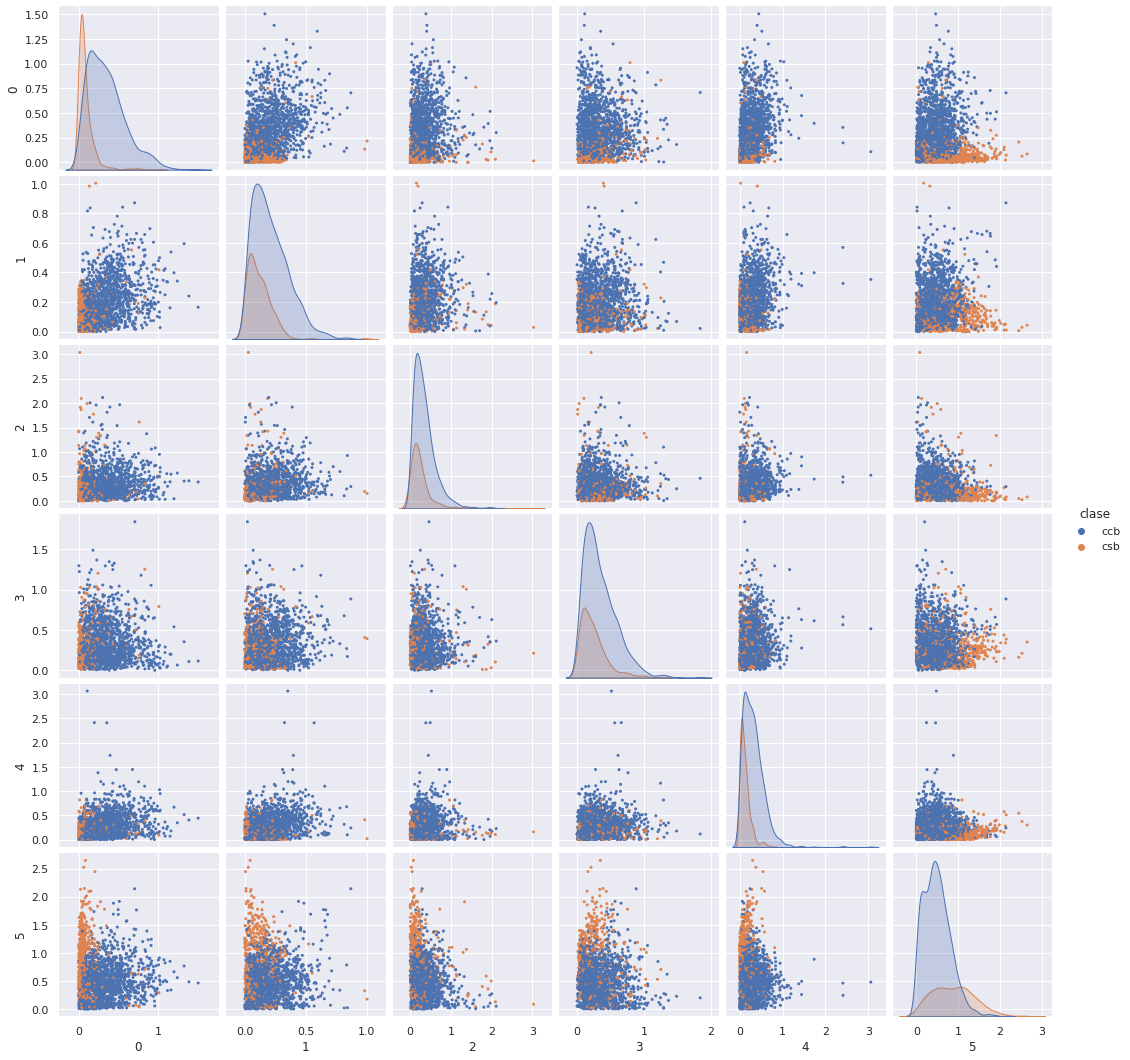

In [39]:
numeric_columns = list(dataset_train_selection.columns) [4:10] 

numeric_columns.append('clase')

sns.pairplot(dataset_train_selection[numeric_columns],hue='clase',hue_order=['ccb', 'csb'],markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()


Como vemos la distribucions mostraas en las variables [0,1,-.....2047] no son de forma gausiana. Considerando la asimetria, podrian seguir una distribucion de Poisson o una distribucion Gamma por ejemplo. 

Podemos ver como al intentar hacer un fit gaussiano sobre una de las distribuciones, la curvano se ajustabien a los datos

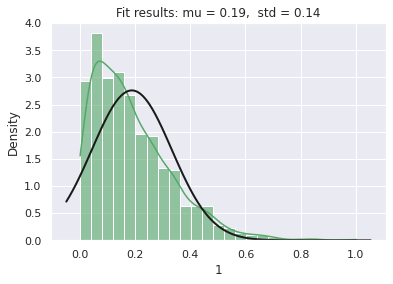

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = dataset_train_selection['1']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
ax = sns.histplot(data, bins=25, stat="density", kde=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()





Podemos hacer un estudio más profundo ajustado a la distribución con un set de diversas funciones. Luego  se considera el  negative log likelihood function  entre la función propuesta y la distribución para ranquear los diversos ajustes. 
Finalmente graficamos los 5 mejores junto a la distribución original.

Este procedimiento mostramos para las 5 primeros features, pero uno podría considerar cualesquiera.


In [41]:
numeric_columns = list(dataset_train_selection.columns) [4:10] 
dataset_train_selection

clase        ch_R        ch_G        ch_B         0         1         2  \
0      csb  191.840561  153.567825  132.866669  0.003306  0.110736  0.085072   
1      csb  183.752380  146.789627  126.877037  0.051257  0.181405  0.080709   
2      csb  175.958160  141.141510  121.987831  0.009964  0.171841  0.359899   
3      csb  187.911713  150.097229  129.374207  0.082800  0.228622  0.162064   
4      csb  173.947571  139.453323  120.885750  0.086575  0.182595  0.344001   
...    ...         ...         ...         ...       ...       ...       ...   
1908   ccb   92.318436   89.827538   75.665024  0.144243  0.836247  0.245479   
1909   ccb   89.923820   82.779854   66.247177  0.164972  0.376838  0.036616   
1910   ccb   98.103539   92.070747   74.903046  0.384320  0.354229  0.108774   
1911   ccb   97.310684   88.274559   71.620628  0.271670  0.196911  0.493742   
1912   ccb  105.734138   94.655632   76.496498  0.064863  0.146449  0.313200   

             3         4         5  ...      2038      2039      2040  \
0     0.106699  0.011154  0.823523  ...  0.240625  0.174334  0.082095   
1     0.096473  0.053091  0.999435  ...  0.518146  0.330701  0.123241   
2     0.102196  0.005156  0.892812  ...  0.505053  0.262259  0.195963   
3     0.051045  0.012488  0.614972  ...  0.427743  0.051373  0.061770   
4     0.104662  0.011670  0.815946  ...  0.615897  0.227388  0.171615   
...        ...       ...       ...  ...       ...       ...       ...   
1908  0.268900  0.676413  0.782113  ...  0.182259  0.026552  0.692655   
1909  0.016291  0.172154  0.040490  ...  0.205030  0.199259  0.414296   
1910  0.000000  0.111219  0.139424  ...  0.265758  0.024944  0.525602   
1911  0.135750  0.326141  0.254340  ...  0.372750  0.020123  0.486447   
1912  0.038207  0.053286  0.412528  ...  0.451980  0.136938  0.171661   

          2041      2042      2043      2044      2045      2046      2047  
0     0.051256  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1     0.102351  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  
2     0.096156  0.378540  0.123568  0.130680  0.034125  0.363607  0.022648  
3     0.175729  0.314424  0.180715  0.015458  0.001125  0.441648  0.007727  
4     0.095271  0.396625  0.229164  0.042033  0.015454  0.450313  0.105094  
...        ...       ...       ...       ...       ...       ...       ...  
1908  0.517668  0.325972  0.295883  0.278505  0.189561  0.501087  0.132643  
1909  0.557889  0.486399  0.085526  0.205289  0.409898  0.912477  0.043854  
1910  0.674632  0.885417  0.041088  0.162134  0.758789  0.849687  0.150298  
1911  0.562567  0.553501  0.058438  0.440513  0.482803  0.638911  0.262574  
1912  0.526640  0.681594  0.132192  0.207461  0.376891  0.677032  0.001313  

[1913 rows x 2052 columns]

In [42]:
import scipy.stats as st
import numpy as np
import warnings


# define a set of distributions to check
distribution_list = [
    st.alpha,
    st.anglit,
    st.arcsine,
    st.beta,
    st.betaprime,
    st.bradford,
    st.burr,
    st.cauchy,
    st.chi,
    st.chi2,
    st.cosine,
    st.dgamma,
    st.dweibull,
    st.erlang,
    st.expon,
    st.exponnorm,
    st.exponweib,
    st.exponpow,
    st.f,
    st.fatiguelife,
    st.fisk,
    st.foldcauchy,
    st.foldnorm,
    st.genlogistic,
    st.genpareto,
    st.gennorm,
    st.genexpon,
    st.genextreme,
    st.gausshyper,
    st.gamma,
    st.gengamma,
    st.genhalflogistic,
    st.gilbrat,
    st.gompertz,
    st.gumbel_r,
    st.gumbel_l,
    st.halfcauchy,
    st.halflogistic,
    st.halfnorm,
    st.halfgennorm,
    st.hypsecant,
    st.invgamma,
    st.invgauss,
    st.invweibull,
    st.johnsonsb,
    st.johnsonsu,
    st.ksone,
    st.kstwobign,
    st.laplace,
    st.levy,
    st.levy_l,
    st.logistic,
    st.loggamma,
    st.loglaplace,
    st.lognorm,
    st.lomax,
    st.maxwell,
    st.mielke,
    # st.nakagami,
    # st.ncx2,
    st.ncf,
    st.nct,
    st.norm,
    st.pareto,
    st.pearson3,
    st.powerlaw,
    st.powerlognorm,
    st.powernorm,
    st.rdist,
    st.reciprocal,
    st.rayleigh,
    st.rice,
    st.recipinvgauss,
    st.semicircular,
    st.t,
    st.triang,
    st.truncexpon,
    st.truncnorm,
    st.tukeylambda,
    st.uniform,
    # st.vonmises,
    # st.vonmises_line,
    st.wald,
    st.weibull_min,
    st.weibull_max,
    st.wrapcauchy,
]

import time

def brute_fitting(data, x_axis):
    # this list will contain the result of the fittings
    distribution_fitting = []

    # fit every distribution in the list above
    for reference_distribution in distribution_list:
        start_time = time.time()
        # pick distribution name
        distribution_name = type(reference_distribution).__name__.split("_")[0]

        try:
            # ignore warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")

                # get parameters from the best fit
                params = reference_distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # build the PDF from previous parameters
                pdf_fitted = reference_distribution.pdf(
                    x_axis, loc=loc, scale=scale, *arg
                )

                # calculate maximum likelihood estimator
                mle = reference_distribution.nnlf(params, data)

                # as an alternative: sum of square error
                sse = np.sum(np.power(x_axis - pdf_fitted, 2.0))

                # add results to list
                time_taken = time.time() - start_time
                distribution_fitting.append(
                    {
                        "ref_data": data,
                        "distr_name": distribution_name,
                        "mle": mle,
                        "sse": sse,
                        "pdf_fitted": pdf_fitted,
                        "params": params,
                        "process_time": time_taken
                    }
                )

        # ignore distributions that could not be fitted
        except Exception:
            print("Discarded function: {}".format(distribution_name))
        
        
    return distribution_fitting

In [43]:
dists_fitting = []
for feat_col in range(5):
    x_data = np.linspace(xmin, xmax, 100)
    distribution_fitting = brute_fitting(dataset_train_selection[str(feat_col)], x_data)
    dists_fitting.append(distribution_fitting)

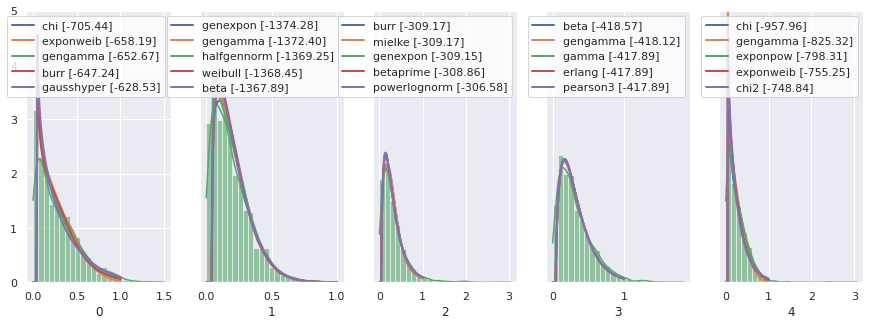

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
xmin, xmax = plt.xlim()
x_data = np.linspace(xmin, xmax, 100)

# Plot the histogram.
sns.set_style("whitegrid")

# just print TOP distributions according to maxim. likelihood estimator
top = 5

# axes.set_prop_cycle('color',plt.cm.rainbow(np.linspace(0,1,top)))

for feat_col in range(5):
    distribution_fitting = dists_fitting[feat_col]
    plot_x = 0#int(feat_col / 5)
    plot_y = feat_col % 5
    ax = sns.histplot(
        ax=axes[plot_y],#[plot_x, plot_y],
        data=distribution_fitting[0]["ref_data"],
        bins=25,
        stat="density",
        kde=True,
        alpha=0.6,
        color="g",
    )
    ax.set_ylim(0, 5)
    ax.set_ylabel("")
    if plot_y != 0:
        ax.set_yticks([])

    sort_by = "mle"  # or sse
    for d in sorted(distribution_fitting, key=lambda k: k[sort_by])[:top]:
        distr_name = d["distr_name"]
        mle = d["mle"]
        pdf_fitted = d["pdf_fitted"]
        params = d["params"]

        label = "{} [{:.2f}]".format(distr_name, mle)

        # Plot the PDF.
        ax.plot(x_data, pdf_fitted, label=label, linewidth=2)

    ax.legend()
plt.show()

**Obs** Podemos ver como la norm no pertenece a los 5 mejores ajustes

Otro modo de determinar si los datos pertenecen a una sola funcion de distribucion es a partir del **Q-Q plot** . Este es un scatter plot de dos sets de quantiles uno contra el otro. si ambos quantiles provienen de la misma distribucion los puntos van a estar alineados.


/home/ro/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


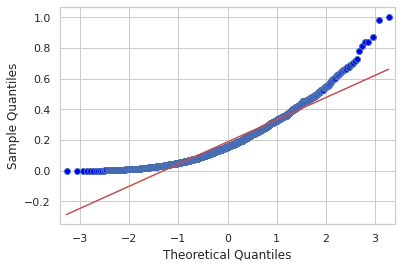

In [45]:
data = dataset_train_selection['1']
import numpy as np
import statsmodels.api as sm
import pylab

sm.qqplot(data, line='s')
pylab.show()

* Las distribuciones ch_R, ch_B y ch_G tampocotienen distribucion normal. Las clase csb tienen ademas una estructura de doble pico bien defina. Asi mismo, se ha ejcutado el codigo anterior para dichas distribuciones y tampoco han demostrado provenir de una distribucion normal

Existen diferentes metodos para determinar la funcion de distribucion que mejor se ajusta a los datos. Por ejemplo, la clase **KernelDensity** de Scikit learn implementa un algoritmo para estimar la función de densidad de distribuciones univariantes y multivariantes. 

**Obs:** podemos ver q no hay correlacion entre lasvariables

* **¿Entre qué variables existe más correlación?**

<AxesSubplot:>

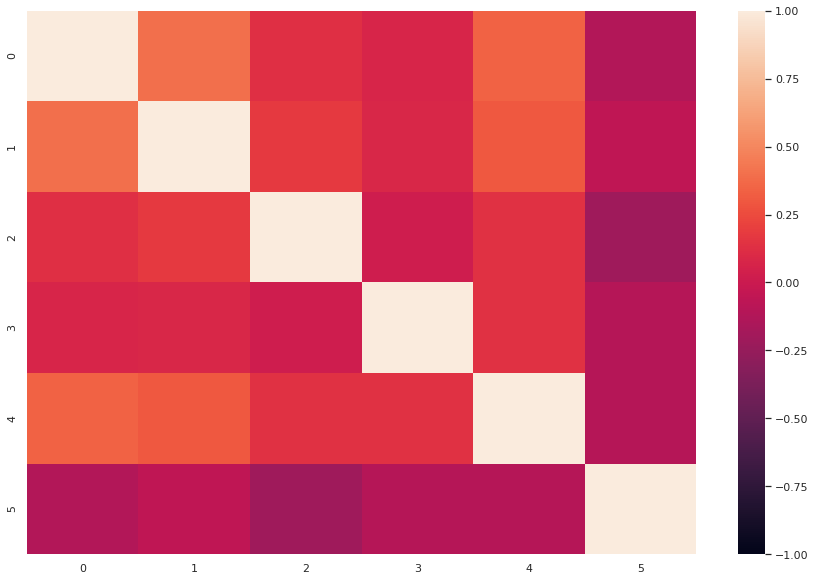

In [46]:
cormat = dataset_train_selection[dataset_train_selection.columns[4:10]].corr()
plt.figure (figsize=(15,10))
sns.heatmap(cormat,vmin= -1, vmax=1)


Podemos ver como la correlacion es baja en la mayoria de los casos

In [47]:
cormat.min().min()

-0.20941809879027054

Estamos trabajando con un dataset de gran dimensionalidad y al momento de analizar los features fuimos seleccionando sin un criterio de selección columnas al azar para hacer el análisis. Esto podría significar que no consideramos un feature que podría haber sido un buen discriminador. Un modo de reducir la dimensionalidad considerando el poder discriminativo de cada feature, es utilizando métodos como **chi2** o **PCA**. Acontinuacion exploramos solo el metodo de Chi2 en este trabajo

### Chi2

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
dataset_train_selection.head(1)


clase        ch_R        ch_G        ch_B         0         1         2  \
0   csb  191.840561  153.567825  132.866669  0.003306  0.110736  0.085072   

          3         4         5  ...      2038      2039      2040      2041  \
0  0.106699  0.011154  0.823523  ...  0.240625  0.174334  0.082095  0.051256   

       2042      2043      2044      2045    2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.5744  0.002943  

[1 rows x 2052 columns]

Cambiamos el rango de valores de las columnas ch_R ch_G ch_B para que esten a la misma escala que el resto

In [50]:
dataset_train_selection['ch_R']=(dataset_train_selection['ch_R']/255 )*5
dataset_train_selection['ch_G']=(dataset_train_selection['ch_G']/255 )*5
dataset_train_selection['ch_B']=(dataset_train_selection['ch_B']/255 )*5

In [51]:
# Create features and target

numeric_columns = list(dataset_train_selection.columns) [1:] 

y = dataset_train_selection["clase"]
X = dataset_train_selection[numeric_columns]
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5) 
X_kbest = chi2_selector.fit_transform(X, y)

fit = chi2_selector.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 50 best features
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


     features       Score
819       816  940.384780
401       398  925.130991
1091     1088  741.129749
1237     1234  675.687561
533       530  655.842553
701       698  634.974243
825       822  620.700728
1709     1706  577.969237
1052     1049  510.421734
1245     1242  483.281375
Original number of features: 2051
Reduced number of features: 5


Considerando que el Score baja gradualmente consideramos los primeros 5. 

In [52]:
names =featureScores.nlargest(10,'Score').features.values 

In [53]:
names = ['clase'] + list(names)

In [54]:
kbest_df = dataset_train_selection[names]

Podemos ver la distribucion de los features seleccionados para cada categoria

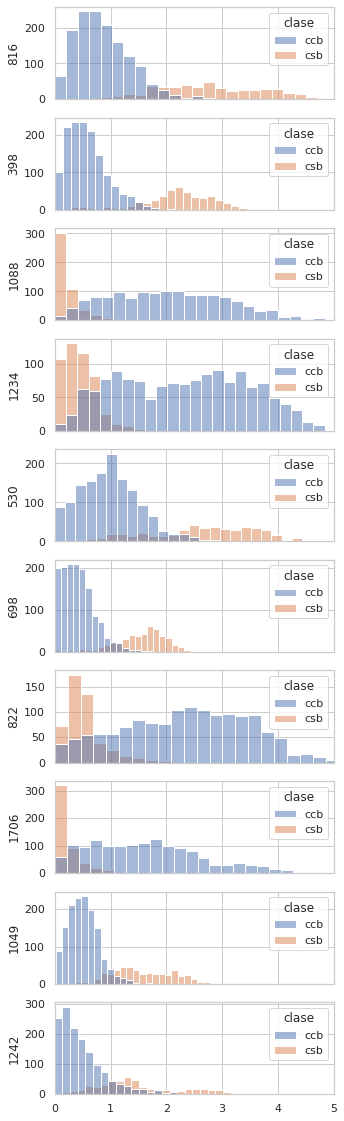

In [55]:
fig, axes = plt.subplots(10, 1, figsize=(5, 20))

for i,plot_feat in enumerate(names[1:]):
    
    sns.histplot(
        ax=axes[i],
        data=kbest_df[[plot_feat, "clase"]],
        x=kbest_df[plot_feat],
        bins=25,
        hue="clase",
        hue_order=["ccb", "csb"],
    )
    axes[i].set_xlim(0, 5)
    if i < 9:
        axes[i].set_xticklabels([])
    axes[i].set_xlabel("")
    axes[i].set_ylabel(plot_feat)
    

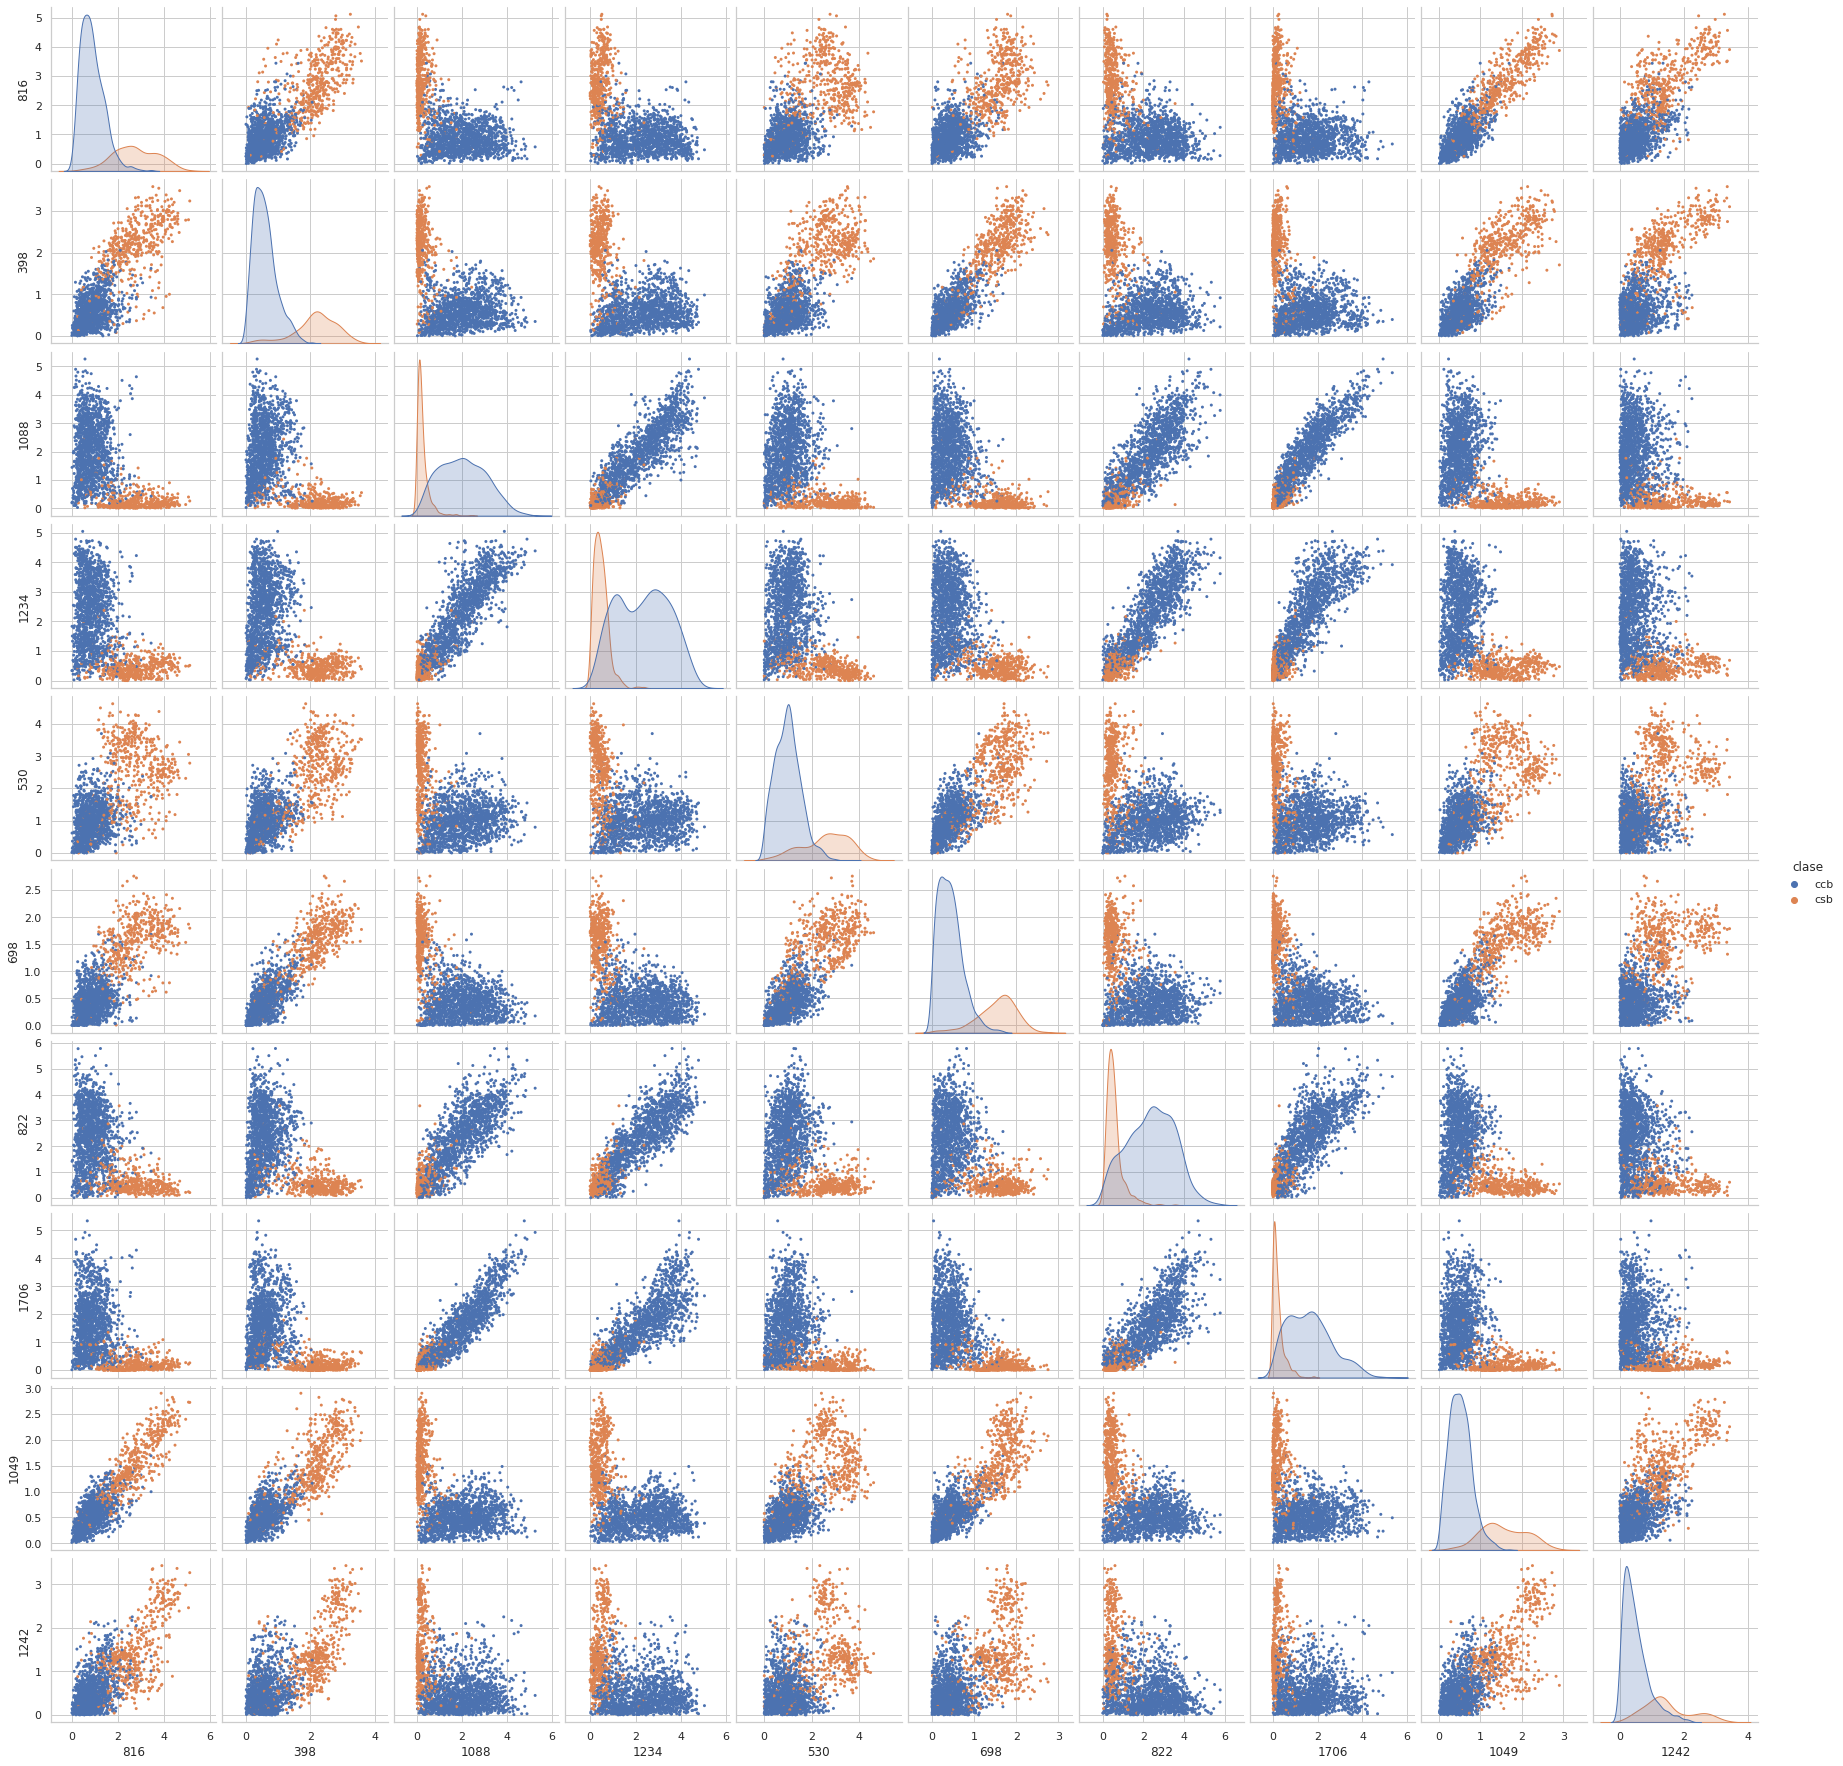

In [56]:

sns.pairplot(kbest_df,hue='clase',hue_order=['ccb', 'csb'],markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()

Podemos ver como las categorias se separan mejor al considerar solo estos features.

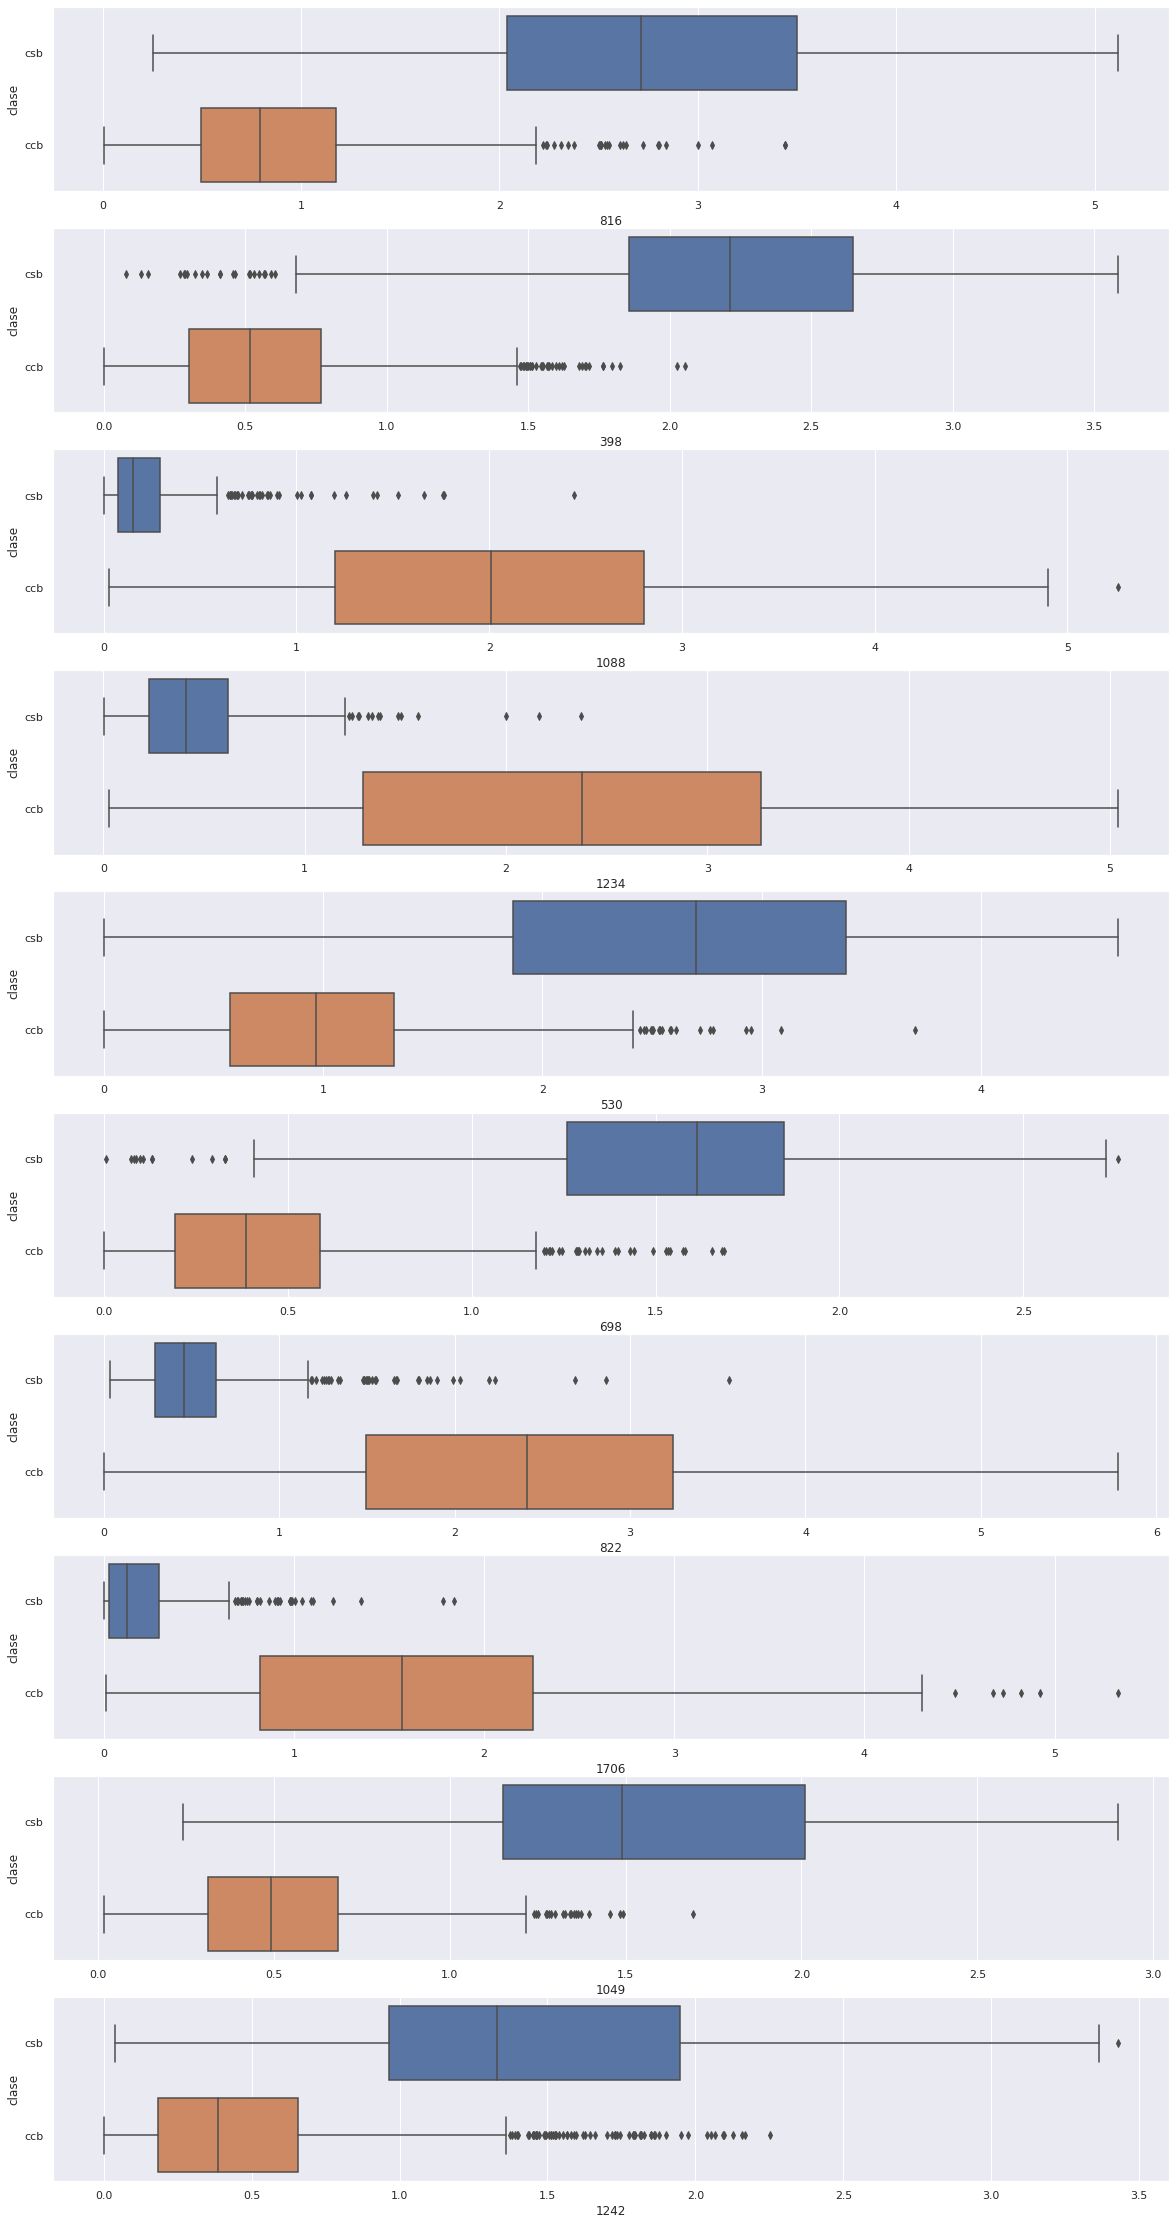

In [87]:
fig, axes = plt.subplots(10, 1, figsize=(20, 40))

for i,plot_feat in enumerate(names[1:]):

    sns.boxplot(
        ax=axes[i],
        data=kbest_df[[plot_feat, "clase"]],
        x=kbest_df[plot_feat],
        y=kbest_df["clase"],
        orient='h'
    )


Podemos ver como cambia la correlacion. 

In [92]:
columnas = list(kbest_df.columns[1:10])+['ch_R','ch_G','ch_B']

<AxesSubplot:>

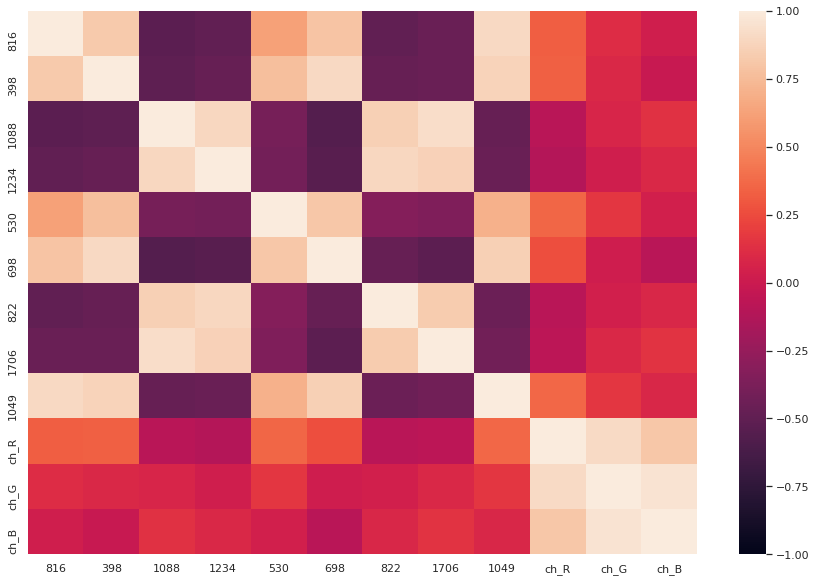

In [94]:
cormat = dataset_train_selection[columnas].corr()
plt.figure (figsize=(15,10))
sns.heatmap(cormat,vmin= -1, vmax=1)

* Las variables ch_R, ch_G, ch_B estan levemente correlacionadas con las principales determinadas por el metodo chi2

**Obs** existe un metodo llamado Principal component analysis (PCA), qe permite extraer los features (o una combinacion de features) mas discriminantes**

#### Otras preguntas disparadoras importantes:

 * ¿Esta balanceado el conjunto de datos? 
 
 No, esto se vio en uno de los primeros puntos con los graficos de barra de la cantidad de imagenes ccb y csb
 
 


* ¿Como se distrubuyen las posiciones de los objetos en las imágenes? 

Este punto ya fue analizado al comienzo en la seleccion de features 

* ¿En que región de las imágenes debería buscar los objetos?

La mayoria de los algoritmos tipo CNN buscan los objetos a lo largo de toda la imagen de modo que no suele ser una variable de interes. 

Segun los graficos de boxplot mostrados anteriormente uno podria inferir que el objeo debe buscarse predominantemente abajo a la izquierda. Sin embargo esto puede ser un bias si se utilizo para este dataset un video de mayor duracion con el objeto de interes en dicha ubicacion.


 * ¿Puedo utilzar el color de las imagenes croppeadas para determinar la clase de objeto? 

Como ya vimos anteriormente las bandas rojo y verde son las que mejor difieren entre las imagenes con y sin mascara, sin embargo no son gran discrimiante ya que no fueron bien ranqeadas por el metodo de chi2.

### Conclusiones

* Se estudiaron los diferentes features del dataset para ver cuales podrían indicar la presencia de caras con barbijo.
* Se consideraron algunas variables que podrían ser indicadoras de un bias
* Se estudiaron métodos de optimización en la selección de variables discriminativas 
* Algunas de las variables deben ser consideradas según el modelo de ML que se emplee en la siguiente etapa. Por este motivo no hemos reducido el número de registros hasta no saber con qué modelo vamos a abordar el aprendizaje automático
* Asimismo, en relación al desbalance de datos con y sin máscara, existen diversas técnicas para incrementar y balancear el dataset, como también la implementación de distintas funciones que contempla el desbalance de los datos.


###  Notas finales:
 Excelente y claro el trabajo. Muy buenas las gráficas obtenidas y los analisis realizados! Muy buena la descripción del reposotirio. 
 
 Si bien hicieron algunas tareas de curación del dataset, como eliminar columnas de datos que no aportan, esta entrega era mas que nada un analisis estadistico del dataset, como ver sus potencialidades y debilidades (como algunas que ya encontraron). 
 
 
 * En algunas gráficas faltan las etiquetas de los ejes.
 
 
 FIXED
 
 
 * Faltan algunos analisis de las variables de color y tamaño. 
 
 
 ADDED
 
 
 * Han encontrados cosas o gráficos que no llevaron a nada? Lo pueden agregar como cosas que no llevaron a nada
 
 
 Si, variables como filename no aportan informacion. Luego variables como el tamaño del objeto a detectar pueden ser importantes para algunos modelos de ML, pero hasta no determinar el modelo autilizar podria no elimarse. En si mismas las variables bb_ no son buenos clasificadores ya que poseen una distribucion similar para ambas clases.
 Por otro lado variables como el videoname podria ser importantes para determinar la existencia de bias, pero no para clasificar mejor las categorias.
 
 
 * En el caso de variables que podrían ser indicadores de presencia de bias, que analisis harían para demostrar que existe ese sesgo? Por ejemplo en los videos, como saber si un video determinado aporta diversidad?.
 
 
 Un indicador de bias podria se videoname. Videos mas largos aortan mas cantidad de imagenes, si estas poseen alguna caracteristica paticular, el modelo podria aprender mas sobre ese patron en particular y perder la robustez. Un modo de studiar esto es eliminando las imagens proveniente de un video y analizando como cambian las distribuciones del resto de las variales. Repitiendo este proceso de a un video a la vez se puede ver si algun video aporta alguna caracteristica unica. Es decir, si no hay bias, las distribuciones del resto de las variables no deberian fluctuar mucho al remover las imagenes de un video. Este tipo de graficos se suelen llamar grafica N-1, porque se elimina de a uno a la vez. Esto se analiza en el siguiente notebook
 
 